In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Final_project/flights.csv', low_memory=False)
df.head(2).T

,0,1
YEAR,2015,2015
MONTH,1,1
DAY,1,1
DAY_OF_WEEK,4,4
AIRLINE,AS,AA
FLIGHT_NUMBER,98,2336
TAIL_NUMBER,N407AS,N3KUAA
ORIGIN_AIRPORT,ANC,LAX
DESTINATION_AIRPORT,SEA,PBI
SCHEDULED_DEPARTURE,5,10


In [2]:
cd

C:\Users\bulsa


In [5]:
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
YEAR,0,0.000000
MONTH,0,0.000000
DAY,0,0.000000
DAY_OF_WEEK,0,0.000000
AIRLINE,0,0.000000
FLIGHT_NUMBER,0,0.000000
TAIL_NUMBER,14721,0.252978
ORIGIN_AIRPORT,0,0.000000
DESTINATION_AIRPORT,0,0.000000
SCHEDULED_DEPARTURE,0,0.000000


In [6]:
airlines = pd.read_csv('Final_project/airlines.csv')

In [7]:
df = pd.merge(df,airlines, left_on='AIRLINE', right_on = 'IATA_CODE')
df.insert(loc=5, column='AIRLINE', value=df.AIRLINE_y)
df = df.drop(['AIRLINE_y','IATA_CODE'], axis=1)

In [8]:
airport = pd.read_csv('Final_project/airports.csv')
df = pd.merge(df,airport[['IATA_CODE','AIRPORT','CITY']], left_on='ORIGIN_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)
df = pd.merge(df,airport[['IATA_CODE','AIRPORT','CITY']], left_on='DESTINATION_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)

In [10]:
dff = df['AIRPORT_x'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Origin Airport Distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [9]:
dff = df.CITY_x.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Origin City Distribution', 
    yaxis = dict(title = '# of Flights')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [11]:
dff = df.AIRLINE.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True)
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Airline distribution', 
                   yaxis = dict(title = '# of Flights'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [12]:
dff = df.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='# of Flights (monthly)', 
    yaxis = dict(title = '# of Flights'
                                                )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [13]:
df['dep_delay'] = np.where(df.DEPARTURE_DELAY>0,1,0)
df['arr_delay'] = np.where(df.ARRIVAL_DELAY>0,1,0)
dff = df.groupby('MONTH').dep_delay.mean().round(2)

dff.index = dff.index.map(month)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure_delay',
    marker = dict(
        color = 'aqua'
    )
)

dff = df.groupby('MONTH').arr_delay.mean().round(2)
dff.index = dff.index.map(month)

trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Months)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 
                                           6:'Saturday', 7:'Sunday'}
dff = df.DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name = 'Weather',
    marker=dict(
        color = dff.DAY_OF_WEEK,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(
    title='# of Flights (Day of Week)', 
    yaxis = dict(title = '# of Flights'
                                                    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

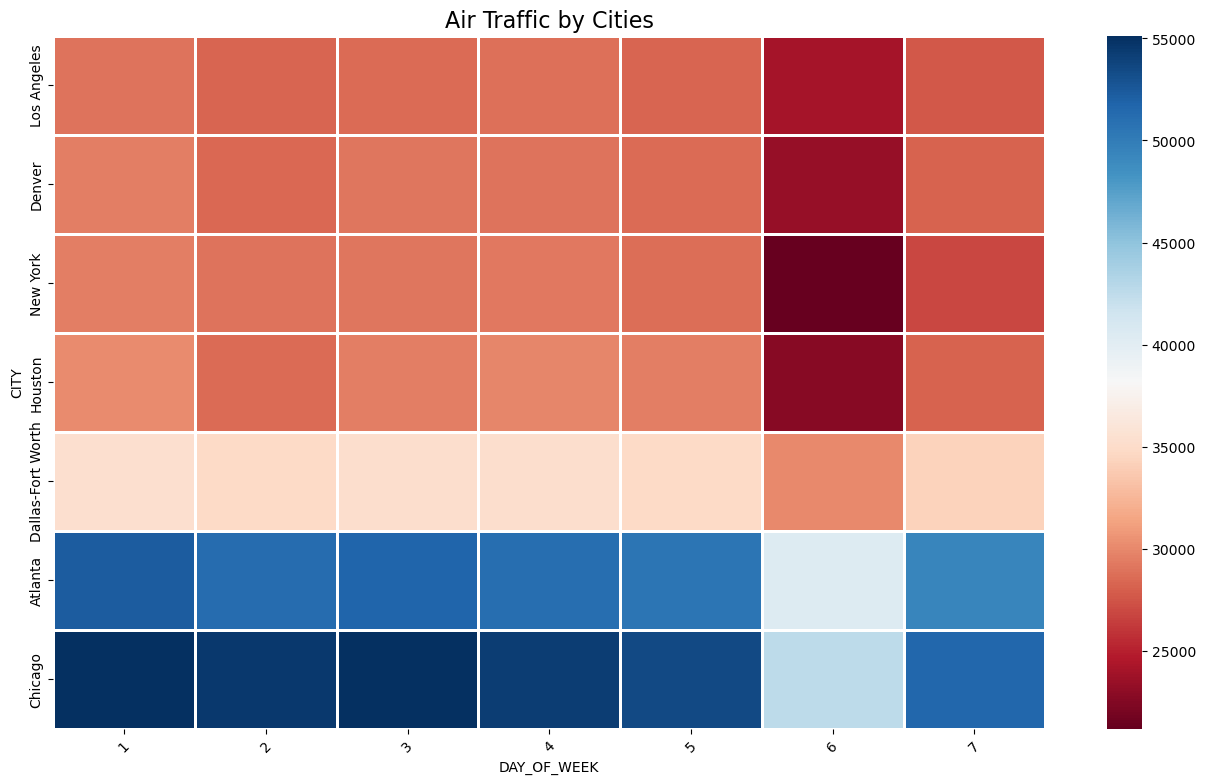

In [15]:
flight_volume = df.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:7]
fv = fv.iloc[::-1]

fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='RdBu',linecolor="w", linewidths=2)

plt.title('Air Traffic by Cities',size=16)
plt.ylabel('CITY')
plt.xticks(rotation=45)
plt.show()

In [16]:
flight_volume = df.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:8]
fv.index = np.where(fv.index=='Dallas-Fort Worth','Dallas', fv.index)

trace = go.Heatmap(z=[fv.values[1],fv.values[2],fv.values[3],fv.values[4],
                      fv.values[5],fv.values[6],fv.values[7]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                      'Saturday','Sunday'],
                   y=fv.index.values, colorscale='Reds'
                  )

data=[trace]
layout = go.Layout(
    title='Air Traffic by Cities')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [17]:
dff = df.groupby('DAY_OF_WEEK').dep_delay.mean().round(2)
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure_delay',
    marker=dict(
        color = 'cyan'
    )
)

dff = df.groupby('DAY_OF_WEEK').arr_delay.mean().round(2)
dff.index = dff.index.map(dayOfWeek)

trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival_delay',
    marker=dict(
        color = 'indigo'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Day of Week)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [18]:
dff = df.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                    ascending=False).round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    name='departure_delay',
    marker=dict(
        color = 'navy'
    )
)

dff = df.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                    ascending=False).round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    name='arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(xaxis=dict(tickangle=15), title='Mean Arrival & Departure Delay by Airlines',
    yaxis = dict(title = 'minute'), 
                   barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [20]:
df['DEP_ARR_DIFF'] = df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']
dff = df.groupby('AIRLINE').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                    ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.DEP_ARR_DIFF,
    marker=dict(
        color = dff.DEP_ARR_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Mean (Departure Delay - Arrival Delay) by Airlines', 
                   yaxis = dict(title = 'minute')
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [19]:
dff = df.groupby('CITY_x').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                        ascending=False)[:8].round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    marker=dict(
        color = 'red'
    )
)

dff = df.groupby('CITY_y').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                        ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    marker=dict(
        color = 'navy'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Mean Departure Delay by City', 
                                                          'Mean Arrival Delay by City'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850, 
                     title='Is it a systematic delay related to departure or arrival city?',  
                     showlegend=False)                    
py.iplot(fig)
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

SyntaxError: invalid syntax (3049577135.py, line 31)

In [24]:
df['SPEED'] = 60*df['DISTANCE']/df['AIR_TIME']
dff = df.groupby('AIRLINE').SPEED.mean().to_frame().sort_values(by='SPEED',
                                                    ascending=False).round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.SPEED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.SPEED.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Mean Speed by Airlines', 
                   yaxis = dict(title = 'Speed')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [20]:
dff = df.groupby('AIRLINE')[['CANCELLED']].mean().sort_values(by='CANCELLED', 
                                                    ascending=False).round(3)

trace1 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(
        symbol = 'star-square',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by Airlines', yaxis = dict(title = 'Cancellation Rate'
                                                       )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

dff = df.groupby('CITY_x')[['CANCELLED']].mean().sort_values(by='CANCELLED', 
                                            ascending=False)[:10].round(3)
trace2 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(symbol = 'diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by Cities', 
                   yaxis = dict(title = 'Cancellation Rate'
                                                     )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [21]:
reason={'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security'}
df.CANCELLATION_REASON = df.CANCELLATION_REASON.map(reason)

dff = df[df.CANCELLED==1]['MONTH'].value_counts().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='# of Cancelled Flights (monthly)', 
    yaxis = dict(title = '# of Flights'
                                                          )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [22]:
dff = df[df.CANCELLATION_REASON=='Weather'].MONTH.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(month)

trace1 = go.Bar(
    x=dff.index,
    y=dff.MONTH,
    name = 'Weather',
    marker=dict(
        color = 'aqua'
    )
)

dff = df[df.CANCELLATION_REASON=='Airline/Carrier'].MONTH.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(month)

trace2 = go.Bar(
    x=dff.index,
    y=dff.MONTH,
    name='Airline/Carrier',
    marker=dict(
        color = 'red'
    )
)

dff = df[df.CANCELLATION_REASON=='National Air System'].MONTH.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(month)

trace3 = go.Bar(
    x=dff.index,
    y=dff.MONTH,
    name='National Air System',
    marker=dict(
        color = 'navy'
    )
)

data = [trace1,trace2,trace3]
layout = go.Layout(
    title='Cancellation Reasons (Monthly)', 
    yaxis = dict(title = '# of Flights'
                                                        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [23]:
dff = df[df.CANCELLATION_REASON == 'Weather'].DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name = 'Weather',
    marker=dict(
        color = 'aqua'
    )
)

dff = df[df.CANCELLATION_REASON=='Airline/Carrier'].DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

trace2 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name='Airline/Carrier',
    marker=dict(
        color = 'red'
    )
)

dff = df[df.CANCELLATION_REASON=='National Air System'].DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

trace3 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name='National Air System',
    marker=dict(
        color = 'navy'
    )
)

data = [trace1,trace2,trace3]
layout = go.Layout(
    title='Cancellation Reasons (Day of Week)', 
    yaxis = dict(title = '# of Flights'
                                                            )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)